<a href="https://colab.research.google.com/github/rodrigoleao2001/Projeto_Python_Frexco/blob/main/Projeto_Python_Frexco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

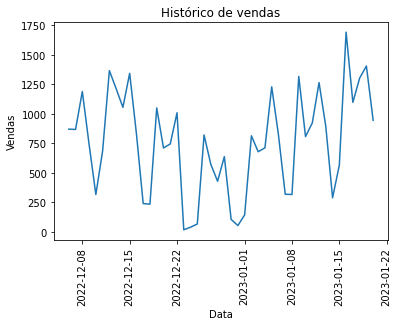

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


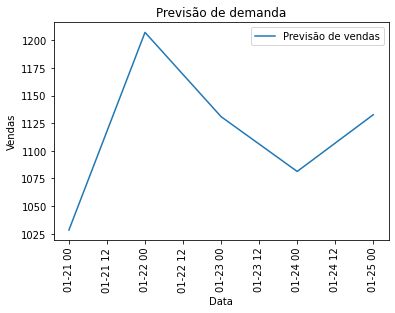

In [ ]:
# Plotando Gráficos do Histórico e da Previsão
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Carregar dados do arquivo excel
df = pd.read_excel('Dados.xlsx')

# Plotar o histórico de vendas
plt.plot(df['Data'], df['Vendas'])
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Histórico de vendas')
plt.xticks(rotation=90)
plt.show()

# Treinar um modelo ARIMA
model = ARIMA(df['Vendas'], order=(2, 1, 0))
model_fit = model.fit(disp=0)

# Gerar as datas para os próximos 5 dias
dates = [np.datetime64('2023-01-21'), np.datetime64('2023-01-22'),
         np.datetime64('2023-01-23'), np.datetime64('2023-01-24'),
         np.datetime64('2023-01-25')]

# Fazer previsões para os próximos 5 dias
forecast = model_fit.forecast(steps=5)[0]

# Plotar a previsão de vendas
plt.plot(dates, forecast, label='Previsão de vendas')
plt.legend(loc='best')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Previsão de demanda')
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


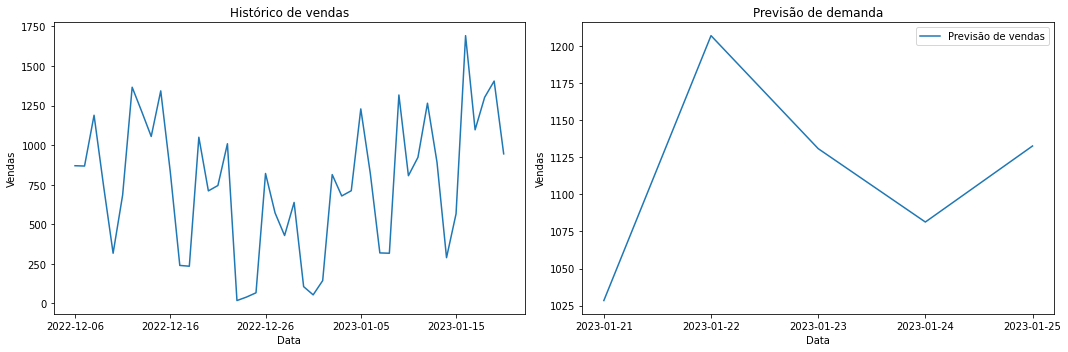

MAE:  291.2196529516053
MSE:  124344.50557883496
RMSE:  352.6251629972469


In [ ]:
#Plotando os 2 gráficos lado a lado para realizar uma comparação e gerando métricas de erro para análise
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import numpy as np

# Carregar dados do arquivo excel
df = pd.read_excel('Dados.xlsx')

# Plotar o histórico de vendas
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(df['Data'], df['Vendas'])
ax[0].set_xlabel('Data')
ax[0].set_ylabel('Vendas')
ax[0].set_title('Histórico de vendas')
ax[0].set_xticks(df['Data'][::10])

# Treinar um modelo ARIMA
model = ARIMA(df['Vendas'], order=(2, 1, 0))
model_fit = model.fit(disp=0)

# Gerar as datas para os próximos 5 dias
dates = [np.datetime64('2023-01-21'), np.datetime64('2023-01-22'),np.datetime64('2023-01-23'), np.datetime64('2023-01-24'),np.datetime64('2023-01-25')]

# Fazer previsões para os próximos 5 dias
forecast = model_fit.forecast(steps=5)[0]

# Plotar a previsão de vendas
ax[1].plot(dates, forecast, label='Previsão de vendas')
ax[1].legend(loc='best')
ax[1].set_xlabel('Data')
ax[1].set_ylabel('Vendas')
ax[1].set_title('Previsão de demanda')
ax[1].set_xticks(dates)

plt.tight_layout()
plt.show()

# Calcular métricas de erro
y_true = df['Vendas'][-5:]
y_pred = forecast

mae = np.mean(np.abs(y_true - y_pred))
mse = np.mean((y_true - y_pred)**2)
rmse = np.sqrt(mse)



print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

In [ ]:
#Com os dados obtidos podemos dizer que é uma boa previsão